In [19]:
#SAMPLE DATASET

import pandas as pd

data = {'jumlah_jam_belajar': [1, 2, 3, 4, 5], 
        'nilai_ujian': [60, 70, 80, 85, 90]}

df = pd.DataFrame(data)
print(df)

   jumlah_jam_belajar  nilai_ujian
0                   1           60
1                   2           70
2                   3           80
3                   4           85
4                   5           90


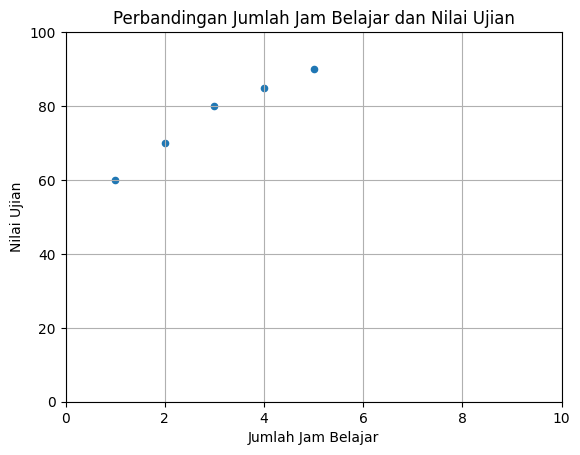

In [24]:
#VISUALISASI DATA

import matplotlib.pyplot as plt

# Plot
df.plot(kind='scatter', x='jumlah_jam_belajar', y='nilai_ujian')

plt.title('Perbandingan Jumlah Jam Belajar dan Nilai Ujian')
plt.xlabel('Jumlah Jam Belajar')
plt.ylabel('Nilai Ujian')
plt.xlim(0, 10)
plt.ylim(0, 100)
plt.grid(True)
plt.show()


In [25]:
#PENYESUAIAN DATASET


import numpy as np
import pandas as pd

# Mengambil nilai X dan y
X = np.array(df['jumlah_jam_belajar'])
y = np.array(df['nilai_ujian'])

print(f'x: {X}')
print(f'y: {y}')


x: [1 2 3 4 5]
y: [60 70 80 85 90]


In [26]:
X = X.reshape(-1, 1)
X.shape

(5, 1)

In [27]:
X

array([[1],
       [2],
       [3],
       [4],
       [5]], dtype=int64)

In [ ]:
pip install scikit-learn

In [32]:
#TRAINING SIMPLE LINEAR REGRESSION MODEL

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [33]:
#VISUALISASI SIMPLE LINEAR REGRESSION MODEL

X_vis = np.array([0, 25]).reshape(-1, 1)
y_vis = model.predict(X_vis)

In [ ]:
plt.scatter(X, y)
plt.plot(X_vis, y_vis, '-r')

plt.title('Perbandingan Jumlah Jam Belajar dan Nilai Ujian')
plt.xlabel('Jumlah Jam Belajar')
plt.ylabel('Nilai Ujian')
plt.xlim(0, 10)
plt.ylim(0, 100)
plt.grid(True)
plt.show()

In [35]:
print(f'intercept: {model.intercept_}')
print(f'slope: {model.coef_}')

intercept: 54.5
slope: [7.5]


In [ ]:
#MENCARI NILAI SLOPE

print(f'X:\n{X}\n')
print(f'X flatten: {X.flatten()}\n')
print(f'y: {y}')

In [37]:
#VARIANCE

variance_x = np.var(X.flatten(), ddof=1)

print(f'variance: {variance_x}')

variance: 2.5


In [38]:
#COVARIANCE

np.cov(X.flatten(), y)

array([[  2.5 ,  18.75],
       [ 18.75, 145.  ]])

In [39]:
covariance_xy = np.cov(X.flatten(), y)[0][1]

print(f'covariance: {covariance_xy}')

covariance: 18.75


In [40]:
#SLOPE

slope = covariance_xy / variance_x

print(f'slope: {slope}')

slope: 7.5


In [41]:
#MENCARI NILAI INTERCEPT

intercept = np.mean(y) - slope * np.mean(X)

print(f'intercept: {intercept}')

intercept: 54.5


In [45]:
#PREDIKSI NILAI

jumlah_jam_belajar_baru = np.array([1.5, 2.5,3.5]).reshape(-1, 1)

In [46]:
prediksi_nilai = model.predict(jumlah_jam_belajar_baru)

print(f'Jumlah Jam Belajar Baru: {jumlah_jam_belajar_baru.flatten()}')
print(f'Prediksi Nilai Mahasiswa: {prediksi_nilai}')

Jumlah Jam Belajar Baru: [1.5 2.5 3.5]
Prediksi Nilai Mahasiswa: [65.75 73.25 80.75]


In [47]:
for jam_belajar, nilai in zip(jumlah_jam_belajar_baru.flatten(), prediksi_nilai):
    print(f'Jumlah Jam Belajar: {jam_belajar} prediksi nilai: {nilai}')

Jumlah Jam Belajar: 1.5 prediksi nilai: 65.75
Jumlah Jam Belajar: 2.5 prediksi nilai: 73.25
Jumlah Jam Belajar: 3.5 prediksi nilai: 80.75


In [48]:
X_train = np.array([1.5, 2.5, 2.8, 3, 4]).reshape(-1, 1)
y_train = np.array([65.75, 73.25, 75, 78, 85])

X_test = np.array([2, 3.8, 4, 4.5, 5]).reshape(-1, 1)
y_test = np.array([72, 80, 85, 87, 90])

In [49]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [50]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)

r_squared = r2_score(y_test, y_pred)

print(f'R-squared: {r_squared}')

R-squared: 0.8511473613881378


In [51]:
ss_res = sum([(y_i - model.predict(x_i.reshape(-1, 1))[0])**2
              for x_i, y_i in zip(X_test, y_test)])

print(f'ss_res: {ss_res}')

ss_res: 29.591904556038187


In [52]:
mean_y = np.mean(y_test)
ss_tot = sum([(y_i - mean_y)**2 for y_i in y_test])

print(f'ss_tot: {ss_tot}')

ss_tot: 198.79999999999998


In [53]:
r_squared = 1 - (ss_res / ss_tot)

print(f'R-squared: {r_squared}')

R-squared: 0.8511473613881378
